<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Instability_of_Estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: Sample Size vs. Standard Deviation

Using the below normal distribution with mean 100 and standard deviation 50, find the means and standard deviations of samples of size 5, 25, 100, and 500.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
POPULATION_MU = 100
POPULATION_SIGMA = 25
sample_sizes = [5, 25, 100, 500]

for i in range(len(sample_sizes)):
    sample = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_sizes[i])
    row = 'Mean',(i+1),':', np.mean(sample),'Std',(i+1),':',np.std(sample)
    print (("{} {}{} {:<10f}    {} {}{} {}").format(*row))
    
print ("\nAs sample size increases, the mean and standard deviation approach those of the population. However, even at the 500 sample level the sample mean is not the same as the population mean.")

Mean 1: 87.379137     Std 1: 21.608568991415332
Mean 2: 102.240217    Std 2: 24.302574023931363
Mean 3: 100.938782    Std 3: 23.13537173250566
Mean 4: 99.963163     Std 4: 24.893582734560667

As sample size increases, the mean and standard deviation approach those of the population. However, even at the 500 sample level the sample mean is not the same as the population mean.


#Instability of Predictions on Mean Alone
##a. Finding Means

Find the means of the following three data sets  
,  , and  .

In [5]:
X = [ 31.,   6.,  21.,  32.,  41.,   4.,  48.,  38.,  43.,  36.,  50., 20.,  46.,  33.,   8.,  27.,  17.,  44.,  16.,  39.,   3.,  37.,
        35.,  13.,  49.,   2.,  18.,  42.,  22.,  25.,  15.,  24.,  11., 19.,   5.,  40.,  12.,  10.,   1.,  45.,  26.,  29.,   7.,  30.,
        14.,  23.,  28.,   0.,  34.,   9.,  47.]
Y = [ 15.,  41.,  33.,  29.,   3.,  28.,  28.,   8.,  15.,  22.,  39., 38.,  22.,  10.,  39.,  40.,  24.,  15.,  21.,  25.,  17.,  33.,
        40.,  32.,  42.,   5.,  39.,   8.,  15.,  25.,  37.,  33.,  14., 25.,   1.,  31.,  45.,   5.,   6.,  19.,  13.,  39.,  18.,  49.,
        13.,  38.,   8.,  25.,  32.,  40.,  17.]
Z = [ 38.,  23.,  16.,  35.,  48.,  18.,  48.,  38.,  24.,  27.,  24., 35.,  37.,  28.,  11.,  12.,  31.,  -1.,   9.,  19.,  20.,   0.,
        23.,  33.,  34.,  24.,  14.,  28.,  12.,  25.,  53.,  19.,  42., 21.,  15.,  36.,  47.,  20.,  26.,  41.,  33.,  50.,  26.,  22.,
        -1.,  35.,  10.,  25.,  23.,  24.,   6.]


print ("Mean X: %.2f"% np.mean(X))
print ("Mean Y: %.2f"% np.mean(Y))
print ("Mean Z: %.2f"% np.mean(Z))

Mean X: 25.00
Mean Y: 24.69
Mean Z: 25.61


##Checking for Normality

Use the jarque_bera function to conduct a Jarque-Bera test on ,  , and   to determine whether their distributions are normal.

In [0]:
Xp = jarque_bera(X)[1]
Yp = jarque_bera(Y)[1]
Zp = jarque_bera(Z)[1]

print (Xp, Yp, Zp)

if Xp < 0.05:
    print ('The distribution of X is likely normal.')
else:
    print ('The distribution of X is likely not normal.')
    
if Yp < 0.05:
    print ('The distribution of Y is likely normal.')
else:
    print ('The distribution of Y is likely not normal.')
    
if Zp < 0.05:
    print ('The distribution of Z is likely normal.')
else:
    print ('The distribution of Z is likely not normal.')



```
0.216026379492 0.25028131217 0.866907001763
The distribution of X is likely not normal.
The distribution of Y is likely not normal.
The distribution of Z is likely not normal.
```



#Instability of Estimates

Create a histogram of the sample distributions of ,   , and ,  along with the best estimate/mean based on the sample.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


All three datasets have a similar mean, but have very different distributions. Mean alone is very non-informative about what is going on in data, and should not be used alone as an estimator.


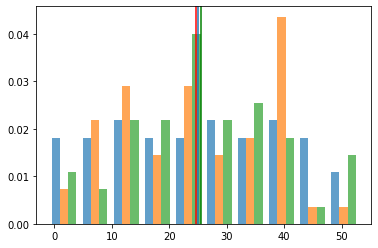

In [9]:
plt.hist([X, Y, Z], normed=1, histtype='bar', stacked=False, alpha = 0.7);
plt.axvline(np.mean(X));
plt.axvline(np.mean(Y), c='r');
plt.axvline(np.mean(Z), c='g');

print ("All three datasets have a similar mean, but have very different distributions. Mean alone is very non-informative about what is going on in data, and should not be used alone as an estimator.") 

#Sharpe Ratio Window Adjustment
##a. Effect on Variability

Just as in the lecture, find the mean and standard deviation of the running sharpe ratio for THO, this time testing for multiple window lengths: 300, 150, and 50. Restrict your mean and standard deviation calculation to pricing data up to 200 days away from the end.

In [0]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

start = '2010-01-01'
end = '2015-01-01'

treasury_ret = get_pricing('BIL', fields='price', start_date=start, end_date=end).pct_change()[1:]
pricing = get_pricing('THO', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

for window in [50, 150, 300]:
    running_sharpe = [sharpe_ratio(returns[i-window+10:i], treasury_ret[i-window+10:i]) for i in range(window-10, len(returns))]
    mean_rs = np.mean(running_sharpe[:-200])
    std_rs = np.std(running_sharpe[:-200])
    
    row = 'Sharpe Mean',(window),':', mean_rs,'Std', window,':',std_rs
    print ("{} {:>3}{} {:<11f}    {:>5} {:>3}{} {}").format(*row)
    
print ("As we increase the length of the window, the variability of the running sharpe ratio decreases." )



```
Sharpe Mean  50: 0.041578         Std  50: 0.152672986316
Sharpe Mean 150: 0.045063         Std 150: 0.0708117281461
Sharpe Mean 300: 0.042417         Std 300: 0.041788831424
As we increase the length of the window, the variability of the running sharpe ratio decreases.
```



#Out-of-Sample Instability

Plot the running sharpe ratio of all three window lengths, as well as their in-sample mean and standard deviation bars.

In [0]:
for window in [50, 150, 300]:
    running_sharpe = [sharpe_ratio(returns[i-window+10:i], treasury_ret[i-window+10:i]) for i in range(window-10, len(returns))]
    mean_rs = np.mean(running_sharpe[:-200])
    std_rs = np.std(running_sharpe[:-200])
    
    _, ax2 = plt.subplots()
    
    ax2.plot(range(window-10, len(returns)), running_sharpe)
    ticks = ax2.get_xticks()

    ax2.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]])
    
    ax2.axhline(mean_rs)
    ax2.axhline(mean_rs + std_rs, linestyle='--')
    ax2.axhline(mean_rs - std_rs, linestyle='--')
    
    ax2.axvline(len(returns) - 200, color='pink');
    plt.title(window, fontsize = 20)
    plt.xlabel('Date')
    plt.ylabel('Sharpe Ratio')
    plt.legend(['Sharpe Ratio', 'Mean', '+/- 1 Standard Deviation'])

    
print ("Despite the longer window Sharpe ratios having less variability, they are still unpredictable with repect to just the mean. But within the context of the standard deviation the mean has more predictive value, as we see that even in the out-of-sample periods the ratios of all window lengths stay mainly within 1 standard deviation of the mean.")



```
Despite the longer window Sharpe ratios having less variability, they are still unpredictable with repect to just the mean. But within the context of the standard deviation the mean has more predictive value, as we see that even in the out-of-sample periods the ratios of all window lengths stay mainly within 1 standard deviation of the mean.
```



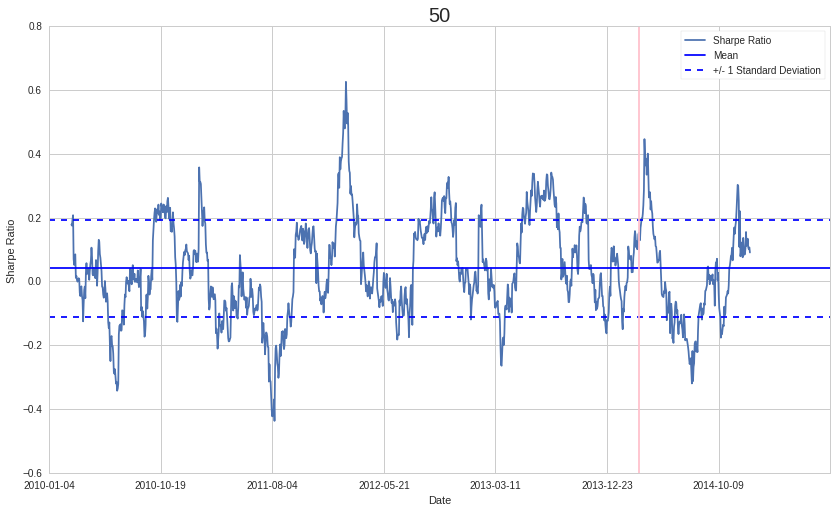

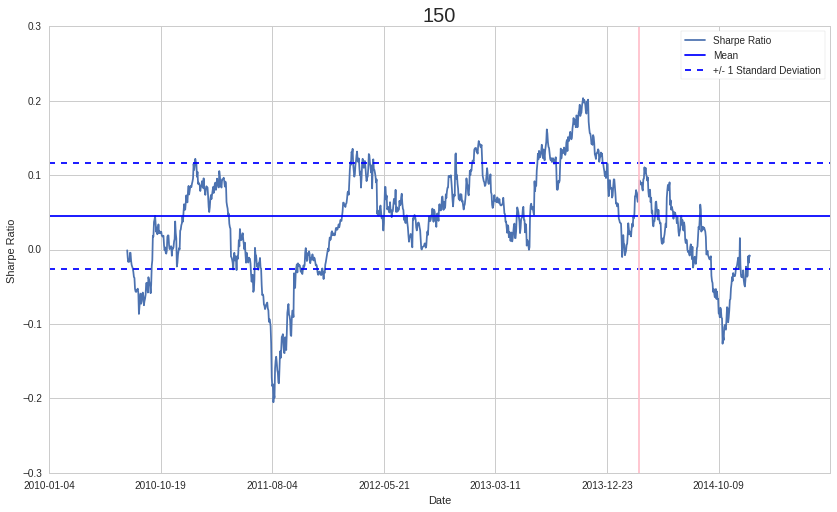

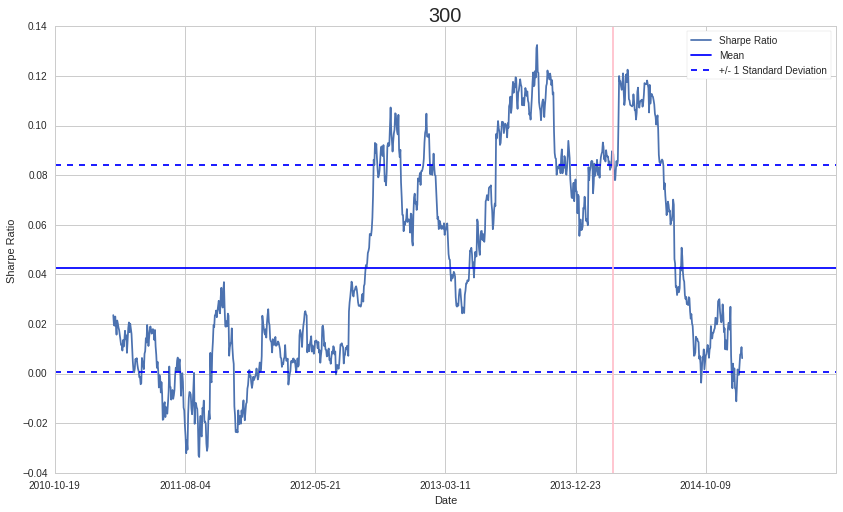

#Weather
##a. Temperature in Boston

Find the mean and standard deviation of Boston weekly average temperature data for the year of 2015 stored in `b15_df`.

In [13]:
b15_df = pd.DataFrame([ 29.,  22.,  19.,  17.,  19.,  19.,  15.,  16.,  18.,  25.,  21.,
        25.,  29.,  27.,  36.,  38.,  40.,  44.,  49.,  50.,  58.,  61.,
        67.,  69.,  74.,  72.,  76.,  81.,  81.,  80.,  83.,  82.,  80.,
        79.,  79.,  80.,  74.,  72.,  68.,  68.,  65.,  61.,  57.,  50.,
        46.,  42.,  41.,  35.,  30.,  27.,  28.,  28.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W')          )

b15_mean = np.mean(b15_df['Weekly Avg Temp'])
b15_std = np.std(b15_df['Weekly Avg Temp'])

print ("Boston Weekly Temp Mean: ", b15_mean)
print ("Boston Weekly Temp Std:  ", b15_std)

Boston Weekly Temp Mean:  49.07692307692308
Boston Weekly Temp Std:   22.983979498978574


#Temperature in Palo Alto

Find the mean and standard deviation of Palo Alto weekly average temperature data for the year of 2015 stored in `p15_df`.

In [14]:
p15_df = pd.DataFrame([ 49.,  53.,  51.,  47.,  50.,  46.,  49.,  51.,  49.,  45.,  52.,
        54.,  54.,  55.,  55.,  57.,  56.,  56.,  57.,  63.,  63.,  65.,
        65.,  69.,  67.,  70.,  67.,  67.,  68.,  68.,  70.,  72.,  72.,
        70.,  72.,  70.,  66.,  66.,  68.,  68.,  65.,  66.,  62.,  61.,
        63.,  57.,  55.,  55.,  55.,  55.,  55.,  48.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

p15_mean = np.mean(p15_df['Weekly Avg Temp'])
p15_std = np.std(p15_df['Weekly Avg Temp'])

print ("Palo Alto Weekly Temp Mean: ", p15_mean)
print ("Palo Alto Weekly Temp Std:  ", p15_std)

Palo Alto Weekly Temp Mean:  59.78846153846154
Palo Alto Weekly Temp Std:   7.974325480183593


#Predicting 2016 Temperatures

Use the means you found in parts a and b to attempt to predict 2016 temperature data for both cities. Do this by creating two histograms for the 2016 temperature data in `b16_df` and `p16_df` with a vertical line where the 2015 means were to represent your prediction.

Avg of Absolute Value of Prediction Error in Boston: 20.810650887573964
Avg of Absolute Value of Prediction Error in Palo Alto: 7.208579881656803

We know from parts a and b that the weather in Boston is much more variable than that of Palo Alto. As a result, we can predict that an estimate based on a sample mean in Boston will be less accurate than an estimate based on a sample from Palo Alto, which is confirmed by this test. The Palo Alto predictions had a much lower error than those of Boston. With mean alone we would not have been able to make any conclusions about the accuracy of our predictions.


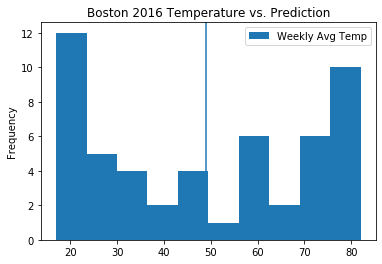

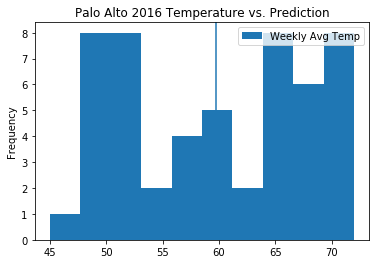

In [15]:
b16_df = pd.DataFrame([ 26.,  22.,  20.,  19.,  18.,  19.,  17.,  17.,  19.,  20.,  23., 22.,  28.,  28.,  35.,  38.,  42.,  47.,  49.,  56.,  59.,  61.,
        61.,  70.,  73.,  73.,  73.,  77.,  78.,  82.,  80.,  80.,  81., 78.,  82.,  78.,  76.,  71.,  69.,  66.,  60.,  63.,  56.,  50.,
        44.,  43.,  34.,  33.,  31.,  28.,  27.,  20.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

p16_df = pd.DataFrame([ 50.,  50.,  51.,  48.,  48.,  49.,  50.,  45.,  52.,  50.,  51., 52.,  50.,  56.,  58.,  55.,  61.,  56.,  61.,  62.,  62.,  64.,
        64.,  69.,  71.,  66.,  69.,  70.,  68.,  71.,  70.,  69.,  72., 71.,  66.,  69.,  70.,  70.,  66.,  67.,  64.,  64.,  65.,  61.,
        61.,  59.,  56.,  53.,  55.,  52.,  52.,  51.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

b16_df.plot.hist(title = "Boston 2016 Temperature vs. Prediction");
plt.axvline(b15_mean);

p16_df.plot.hist(title = "Palo Alto 2016 Temperature vs. Prediction");
plt.axvline(p15_mean);

b_avg_error = np.mean(abs(b16_df['Weekly Avg Temp'] - b15_mean))
p_avg_error = np.mean(abs(p16_df['Weekly Avg Temp'] - p15_mean))

print ("Avg of Absolute Value of Prediction Error in Boston:", b_avg_error)
print ("Avg of Absolute Value of Prediction Error in Palo Alto:", p_avg_error)
print ("\nWe know from parts a and b that the weather in Boston is much more variable than that of Palo Alto. As a result, we can predict that an estimate based on a sample mean in Boston will be less accurate than an estimate based on a sample from Palo Alto, which is confirmed by this test. The Palo Alto predictions had a much lower error than those of Boston. With mean alone we would not have been able to make any conclusions about the accuracy of our predictions.")